# Building with LangGraph

## Building a ChatBot

In [19]:
%pip install -U -q openai langchain langchain-openai langchain-community langchain-tavily langgraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [3]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [4]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-5-mini", temperature=0.5)

def chatbot(state: State):
  return { "messages": [llm.invoke(state["messages"])] }

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

## Visualizing the Graph

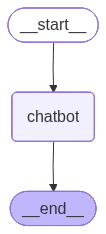

In [5]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
%pip install -q grandalf

Note: you may need to restart the kernel to use updated packages.


In [7]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


## Running the ChatBot

In [ ]:
while True:
  user_input = input('User: ')
  if user_input.lower() in ['exit', 'quit', 'bye', 'q']:
    print("Exiting the chatbot. Goodbye!")
    break

  for event in graph.stream({"messages": ('user', user_input)}):
    for value in event.values():
      print(f'Assistant: {value["messages"][-1].content}')
      print('-' * 20)

Exiting the chatbot. Goodbye!


## Tavily AI

In [9]:
%pip install -q tavily-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
from tavily import TavilyClient
import os

client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))
response = client.search(query='What is the Bitcoin price today?')
response

{'query': 'What is the Bitcoin price today?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.etoro.com/markets/btc',
   'title': 'Live Bitcoin Price, Charts & News - BTC Today | eToro',
   'content': "The Bitcoin price today is \u200e$\u200e106,725.39, a \u200e-0.65\u200e% change in the last 24 hours and \u200e-3.30\u200e% in the past week. Bitcoin's 24-hour trading volume is 99.4B and",
   'score': 0.94174546,
   'raw_content': None},
  {'url': 'https://www.kraken.com/prices/bitcoin',
   'title': 'Bitcoin price today - BTC price chart & live trends - Kraken',
   'content': "Bitcoin price today is $107,228.00. In the last 24 hours Bitcoin's price moved +1.33%. The current BTC to USD conversion rate is $107,228.00 per BTC.",
   'score': 0.9416167,
   'raw_content': None},
  {'url': 'https://coinmarketcap.com/currencies/bitcoin/',
   'title': 'Bitcoin price today, BTC to USD live price, marketcap and chart',
   'content': 'The live Bitcoin

In [12]:
for result in response['results']:
  print(f"Title: {result['title']}, URL: {result['url']}")


Title: Live Bitcoin Price, Charts & News - BTC Today | eToro, URL: https://www.etoro.com/markets/btc
Title: Bitcoin price today - BTC price chart & live trends - Kraken, URL: https://www.kraken.com/prices/bitcoin
Title: Bitcoin price today, BTC to USD live price, marketcap and chart, URL: https://coinmarketcap.com/currencies/bitcoin/
Title: BTC USD — Bitcoin Price and Chart - TradingView, URL: https://www.tradingview.com/symbols/BTCUSD/
Title: Bitcoin Price, BTC Price, Live Charts, and Marketcap - Coinbase, URL: https://www.coinbase.com/price/bitcoin


In [13]:
response = client.search(
  query='What are the best programming languages to learn this year?',
  search_depth='advanced',
  max_results=7,
  include_images=True,
  include_answer=True,
  include_raw_content=False
  )
response

{'query': 'What are the best programming languages to learn this year?',
 'follow_up_questions': None,
 'answer': 'Python, Java, and JavaScript are highly recommended for 2025 due to their versatility and strong demand in various industries. Go is also gaining traction for its performance and niche applications.',
 'images': ['https://infographicplaza.com/wp-content/uploads/top-10-programming-languages-infographic-plaza.jpg',
  'https://blog.pwskills.com/wp-content/uploads/2023/12/TOP-20-BEST-PROGRAMMING-LANGUAGES-.png',
  'https://itechhacks.com/wp-content/uploads/2022/05/Programming-Language.png',
  'https://statisticsanddata.org/wp-content/uploads/2024/07/Most-Popular-Programming-Languages-2024-1.png',
  'https://cdn.hackr.io/uploads/posts/attachments/1677927034t0ScViNfXE.png'],
 'results': [{'url': 'https://www.pluralsight.com/resources/blog/upskilling/top-programming-languages-2025',
   'title': 'Top 10 programming languages in 2025 - Pluralsight',
   'content': 'Every year, Plura

In [14]:
answer = client.qna_search(
  query='Who won the UEFA Champions League in 2024?',
)
print(answer)

Real Madrid won the 2024 UEFA Champions League final. They defeated Borussia Dortmund 2-0 at Wembley Stadium. This victory marked Real Madrid's 15th European Cup title.


In [15]:
from langchain_community.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI


query = 'What is the "Reflection & Critique" pattern used in agentic applications and LangGraph?'

response = client.search(query, max_results=5, search_depth='advanced')['results']
response

[{'url': 'https://medium.com/aimonks/reflection-agents-with-langgraph-agentic-llm-based-applications-87e43c27adc7',
  'title': 'Reflection Agents With LangGraph | Agentic LLM Based Applications',
  'content': 'In this first article, we’ll go over what is reflection in LLM based applications. Types of reflection agents and their implementations. When to use reflection agents and much more.\n\n## What Is Reflection?\n\nReflection is a prompting strategy used to improve the quality and success rate of agents and similar AI systems. It involves prompting an LLM to reflect on and critique its past actions, sometimes incorporating additional external information such as tools and observations. [...] So, let’s move ahead and create these two agents and have the reflect agent critique the initial response manually, then we’ll move on to doing the same with LangGraph in a more sophisticated and automated manner. Open the `basic_02.py`file and have the following code inside of it. [...] So basic

In [16]:
# Setting up the OpenAI API prompt
prompt = [
    {"role": "system", "content": f'''You are an AI critical thinker research assistant.
     Your sole purpose is to write well written, objective and structured reports on a givent text.'''
},
    {"role": "user", "content": f'''Information """{response}""""
    Using the above information, answer the following query: """{query}""" in a detailed report.'''}
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant.\n     Your sole purpose is to write well written, objective and structured reports on a givent text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information """[{\'url\': \'https://medium.com/aimonks/reflection-agents-with-langgraph-agentic-llm-based-applications-87e43c27adc7\', \'title\': \'Reflection Agents With LangGraph | Agentic LLM Based Applications\', \'content\': \'In this first article, we’ll go over what is reflection in LLM based applications. Types of reflection agents and their implementations. When to use reflection agents and much more.\\n\\n## What Is Reflection?\\n\\nReflection is a prompting strategy used to improve the quality and success rate of agents and similar AI systems. It involves prompting an LLM to reflect on and critique its past actions, sometimes incorporating additional external information such as tools and observations. [...] So, let’s move ahead and 

In [17]:
response = ChatOpenAI(model_name="gpt-5-mini").invoke(lc_messages)
print(response.content)

Report: The "Reflection & Critique" Pattern in Agentic Applications and LangGraph

Summary
- The Reflection & Critique pattern is a design strategy for agentic LLM applications that pairs a content-generating agent with one or more critique agents. The critique agent(s) analyze the generator’s outputs, point out errors or improvements, and feed structured feedback back into the generator in an iterative loop until the output meets quality criteria.
- This pattern aims to increase correctness, reliability, and robustness of multi-step or high-stakes LLM workflows (e.g., code generation, long-form content, multi-step reasoning) by enforcing a post-output evaluation step rather than accepting a first-pass generation.

Background and purpose
- Reflection is described as a prompting strategy that asks an LLM to reflect on and critique its past actions and outputs, optionally using external observations or tools.
- In agentic systems — agents that act autonomously over time and manage state 

## Enhancing the Chatbot with Tools

In [22]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=3)

tools = [tool]

In [23]:
response = tool.invoke('What is GPT o1?')
response

[{'title': 'OpenAI o1 - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/OpenAI_o1',
  'content': 'OpenAI o1 is a generative pre-trained transformer (GPT), the first in OpenAI\'s "o" series of reasoning models. A preview of o1 was released by OpenAI on September 12, 2024. o1 spends time "thinking" before it answers, making it better at complex reasoning tasks, science and programming than GPT-4o. The full version was released to ChatGPT users on December 5, 2024.\n\n## History\n\n[edit]\n\n### Background\n\n[edit] [...] ## Limitations\n\n[edit]\n\no1 usually requires more computing time and power than other GPT models by OpenAI, because it generates long chains of thought before making the final response.\n\nAccording to OpenAI, o1 may "fake alignment", that is, generate a response that is contrary to accuracy and its own chain of thought, in about 0.38% of cases. [...] o1-preview\'s API is several times more expensive than GPT-4o. As of January 2025, API usage for the full o1 model

In [24]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-5-mini", temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
  return { "messages": [llm_with_tools.invoke(state["messages"])] }

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node('tools', tool_node)

graph_builder.add_conditional_edges('chatbot', tools_condition)

graph_builder.add_edge('tools', 'chatbot')

graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

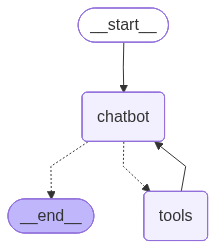

In [25]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
while True:
  user_input = input('User: ')
  if user_input.lower() in ['exit', 'quit', 'bye', 'q']:
    print("Exiting the chatbot. Goodbye!")
    break

  for event in graph.stream({"messages": ('user', user_input)}):
    for value in event.values():
      print(f'Assistant: {value["messages"][-1].content}')
      print('-' * 20)

Assistant: 
--------------------
Assistant: [{"title": "Sarah Sjöström - Women's 100m Freestyle | Gold Medal Highlights", "url": "https://www.olympics.com/en/video/sarah-sjostrom-women-s-100m-freestyle-gold-medal-highlights-swimming-olympic-games-paris-2024/", "content": "Skip to main content\n\nUp next\n\n## \n\nPlaying in... 5 secs\n\nPause)\n\n Paris 2024 | Olympic Games\n\n## Sarah Sjöström - Women's 100m Freestyle | Gold Medal Highlights | Swimming | Olympic Games Paris 2024\n\nWatch the Women's 100m Freestyle Gold Medal Highlights from the Olympic Games Paris 2024!\n\nPresented by\n\n Paris 2024 | Olympic Games\n\n# Sarah Sjöström - Women's 100m Freestyle | Gold Medal Highlights | Swimming | Olympic Games Paris 2024 [...] Watch the Women's 100m Freestyle Gold Medal Highlights from the Olympic Games Paris 2024!\n\n## You may like\n\n ### Top 5 women performances in Pyeongchang\n ### Series Trailer | Wait For It\n ### This Beach Volleyball Sparked a Revolution at the Paris Olympics

## Adding Memory to the Chatbot

In [27]:
%pip install -q langgraph-checkpoint-sqlite

Note: you may need to restart the kernel to use updated packages.


In [28]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [29]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-5-mini", temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
  return { "messages": [llm_with_tools.invoke(state["messages"])] }

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node('tools', tool_node)

graph_builder.add_conditional_edges('chatbot', tools_condition)

graph_builder.add_edge('tools', 'chatbot')

graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

In [30]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer=MemorySaver())

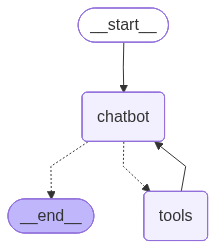

In [31]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
config = {'configurable': {'thread_id': '1'}}

In [33]:
prompt = 'Hi! My name is Miroslav and you are a math tutor.'
events = graph.stream({"messages": ('user', prompt)}, config=config, stream_mode='values')

for event in events:
  event['messages'][-1].pretty_print()

================================ Human Message =================================

Hi! My name is Miroslav and you are a math tutor.
================================== Ai Message ==================================

Hi Miroslav — nice to meet you! I’m your math tutor. How would you like to get started?

Tell me:
- What level are you working at (middle school, high school, college, grad)?
- Which topic(s) do you want help with (algebra, geometry, trig, precalc, calculus, linear algebra, probability & statistics, proofs, contest math, etc.)?
- Any specific goals or deadlines (homework, test prep, long-term study)?
- How do you prefer to learn — step-by-step explanations, lots of examples, practice problems, visual/sketches, or short conceptual summaries?

If you want, I can:
- Give a quick diagnostic problem to see your level,
- Walk through a problem you’re stuck on,
- Create a study plan and practice set.

Say what you prefer and we’ll jump in.


In [34]:
prompt = 'What is my name? What is your role?'
events = graph.stream({"messages": ('user', prompt)}, config=config, stream_mode='values')

for event in events:
  event['messages'][-1].pretty_print()

================================ Human Message =================================

What is my name? What is your role?
================================== Ai Message ==================================

Your name is Miroslav. My role is your math tutor — I’ll help explain concepts, walk through problems, give practice, and prepare you for tests. Ready to start?


In [35]:
config2 = {'configurable': {'thread_id': '2'}}

prompt = 'What is my name? What is your role?'
events = graph.stream({"messages": ('user', prompt)}, config=config2, stream_mode='values')

for event in events:
  event['messages'][-1].pretty_print()

================================ Human Message =================================

What is my name? What is your role?
================================== Ai Message ==================================

I don't know your name — I don't have access to your personal profile or any external data unless you tell me. If you want, tell me how you'd like to be addressed (first name, nickname, etc.) and I can use that for the rest of this conversation.

My role: I'm an AI assistant (a large language model). I can answer questions, explain concepts, help with writing/coding/planning, summarize text, and more. I can’t access private files or do actions outside this chat, and I don’t retain personal information between conversations unless you explicitly provide it. How would you like me to address you?


In [36]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi! My name is Miroslav and you are a math tutor.', additional_kwargs={}, response_metadata={}, id='711e3ba5-7b10-4611-b083-ab509adb5500'), AIMessage(content='Hi Miroslav — nice to meet you! I’m your math tutor. How would you like to get started?\n\nTell me:\n- What level are you working at (middle school, high school, college, grad)?\n- Which topic(s) do you want help with (algebra, geometry, trig, precalc, calculus, linear algebra, probability & statistics, proofs, contest math, etc.)?\n- Any specific goals or deadlines (homework, test prep, long-term study)?\n- How do you prefer to learn — step-by-step explanations, lots of examples, practice problems, visual/sketches, or short conceptual summaries?\n\nIf you want, I can:\n- Give a quick diagnostic problem to see your level,\n- Walk through a problem you’re stuck on,\n- Create a study plan and practice set.\n\nSay what you prefer and we’ll jump in.', additional_kwargs={'refusa

In [38]:
snapshot.next

()